In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train.csv')

In [12]:
df[df['label'] == 1].head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1


In [8]:
print(df['text'][0])
print('\n')
print(df['text'][1])

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails 

In [4]:
word_count = df['text'].str.split().str.len().value_counts().max()
print(word_count)

31


In [7]:
## Get the Independent Features
# X=df.drop('label',axis=1)
X = df

In [8]:
X.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
## Get the Dependent features
# y=df['label']

In [ ]:
# y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.head(10)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
10,20810,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn,Have you seen that pro-Hillary TV ad of disgra...
11,20811,“Working Class Hero” by John Brennon,Doug Diamond,"Source: CNBC, article by Robert Ferris Arctic ..."
12,20812,The Rise of Mandatory Vaccinations Means the E...,Shaun Bradley,Written by Shaun Bradley Mandatory vaccinati...
13,20813,Communists Terrorize Small Business,Steve Watson,Store Communists Terrorize Small Business The ...


In [11]:
messages=df.copy()

In [12]:
messages.reset_index(inplace=True)

In [13]:
messages.head(10)

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
5,7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
6,10,20810,184 U.S. generals and admirals endorse Trump f...,Dr. Eowyn,Have you seen that pro-Hillary TV ad of disgra...
7,11,20811,“Working Class Hero” by John Brennon,Doug Diamond,"Source: CNBC, article by Robert Ferris Arctic ..."
8,12,20812,The Rise of Mandatory Vaccinations Means the E...,Shaun Bradley,Written by Shaun Bradley Mandatory vaccinati...
9,13,20813,Communists Terrorize Small Business,Steve Watson,Store Communists Terrorize Small Business The ...


In [14]:
messages['title'][6]

'184 U.S. generals and admirals endorse Trump for Commander-In-Chief'

In [15]:
messages.shape

(4575, 5)

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from nltk.tokenize import word_tokenize
from joblib import Parallel, delayed
import multiprocessing

In [17]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\knaik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\knaik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Initialize stopwords and stemmer once
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def process_text(text):
    # Remove non-alphabetic characters and convert to lower case
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and stem
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Number of cores for parallel processing
num_cores = multiprocessing.cpu_count()

# Apply process_text function to each row in parallel
corpus = Parallel(n_jobs=num_cores)(delayed(process_text)(text) for text in messages['text'])

In [19]:
corpus[3]

'min ago view comment like first time histori film panoram video station mean see everyth see eye say abl feel like real cosmonaut borisenko rt video present rt collabor russian space agenc roscosmo rocket space corpor energia project websit space rt com subscrib like leav repli login social id email address publish name'

In [20]:
len(corpus)

4575

In [21]:
preprocessed_text = pd.DataFrame()

In [23]:
preprocessed_text['text'] = corpus
# preprocessed_text['label'] = messages['label']

In [24]:
lengths = []
for text in corpus:
    # For a single string, just split it and get its length
    word_count = len(text.split())
    lengths.append(word_count)

In [25]:
preprocessed_text['lengths'] = lengths

In [26]:
preprocessed_text.head()

,text,lengths
0,palo alto calif year scorn polit process silic...,751
1,video nodapl nativ american leader vow stay wi...,439
2,first succeed tri differ sport tim tebow heism...,357
3,min ago view comment like first time histori f...,53
4,sunday nbc meet press hous minor leader rep na...,46


In [27]:
preprocessed_text.to_csv('preprocessed_articles_test_data.csv')

# Analyze the lengths

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [30]:
# Assuming 'lengths' is your list of word counts from previous step
# lengths = [len(text.split()) for text in corpus]

# Create a DataFrame for easier analysis
df_lengths = pd.DataFrame({'word_count': lengths})

print("=" * 50)
print("TEXT LENGTH DISTRIBUTION ANALYSIS")
print("=" * 50)

# 1. Basic Statistical Summary
print("\n1. BASIC STATISTICS:")
print(df_lengths['word_count'].describe())

# Additional statistics
print(f"\nMedian: {df_lengths['word_count'].median()}")
print(f"Mode: {df_lengths['word_count'].mode().values[0]}")
print(f"Range: {df_lengths['word_count'].max() - df_lengths['word_count'].min()}")
print(f"IQR (Q3-Q1): {df_lengths['word_count'].quantile(0.75) - df_lengths['word_count'].quantile(0.25)}")

TEXT LENGTH DISTRIBUTION ANALYSIS

1. BASIC STATISTICS:
count    18285.000000
mean       442.542357
std        467.117665
min          0.000000
25%        171.000000
50%        341.000000
75%        603.000000
max      12058.000000
Name: word_count, dtype: float64

Median: 341.0
Mode: 0
Range: 12058
IQR (Q3-Q1): 432.0


In [31]:
# 2. Percentile Analysis
print("\n2. PERCENTILE ANALYSIS:")
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    print(f"{p}th percentile: {df_lengths['word_count'].quantile(p/100):.1f} words")


2. PERCENTILE ANALYSIS:
1th percentile: 6.0 words
5th percentile: 40.0 words
10th percentile: 81.0 words
25th percentile: 171.0 words
50th percentile: 341.0 words
75th percentile: 603.0 words
90th percentile: 824.0 words
95th percentile: 1054.8 words
99th percentile: 2252.0 words


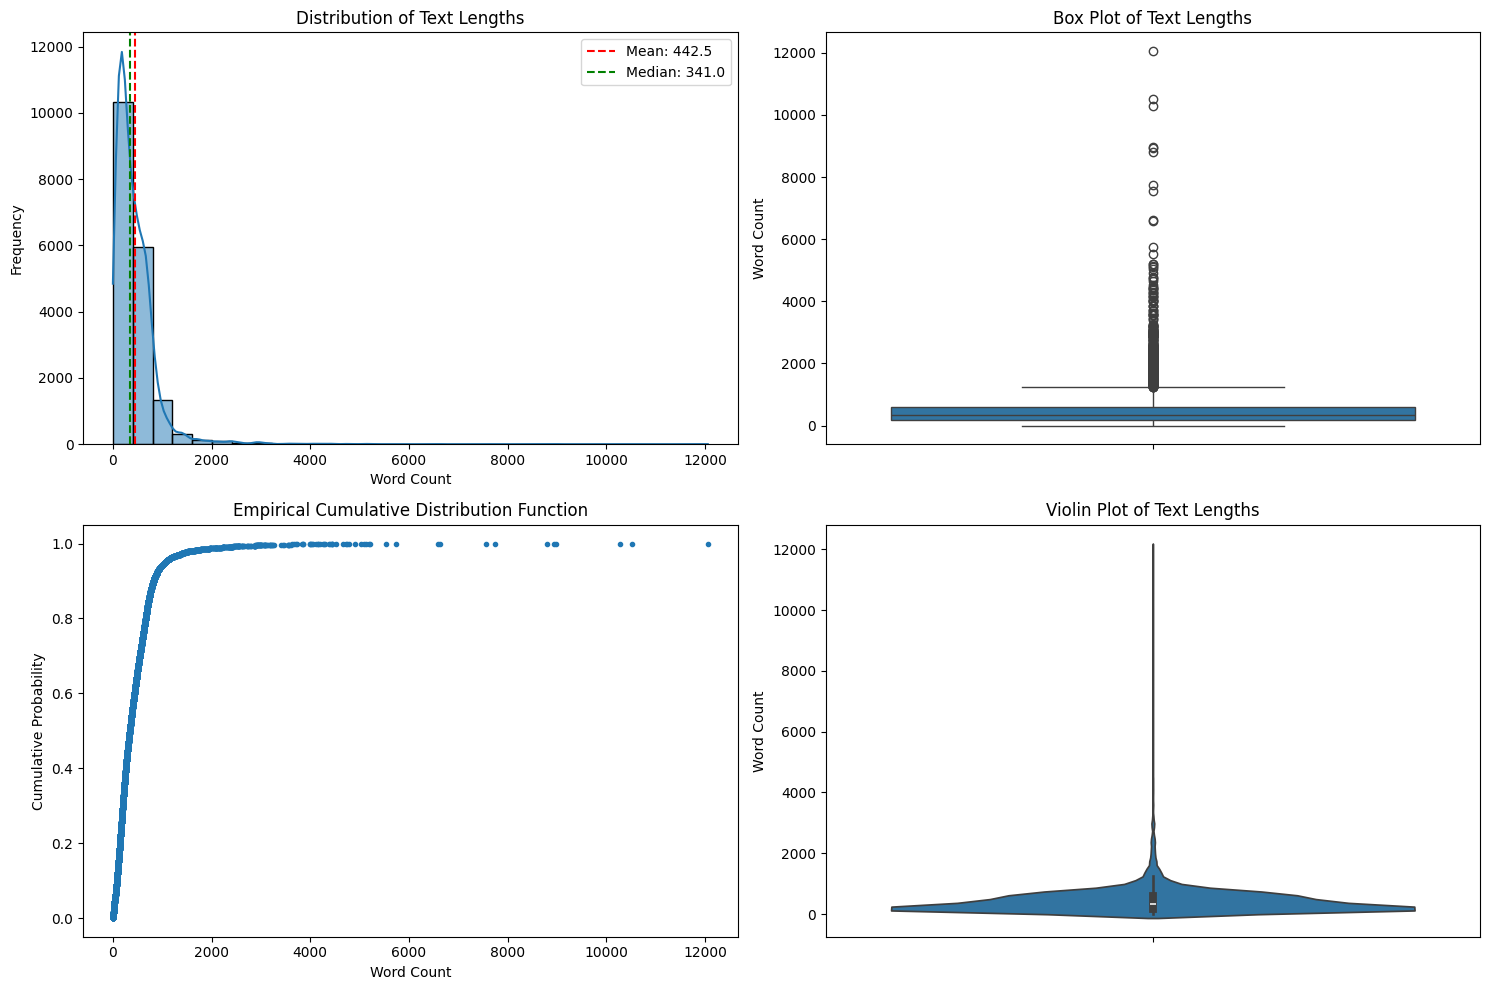

In [32]:
# 3. Distribution Visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Histogram with KDE
plt.subplot(2, 2, 1)
sns.histplot(data=df_lengths, x='word_count', kde=True, bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.axvline(df_lengths['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df_lengths["word_count"].mean():.1f}')
plt.axvline(df_lengths['word_count'].median(), color='green', linestyle='--', label=f'Median: {df_lengths["word_count"].median():.1f}')
plt.legend()

# Subplot 2: Box plot
plt.subplot(2, 2, 2)
sns.boxplot(data=df_lengths, y='word_count')
plt.title('Box Plot of Text Lengths')
plt.ylabel('Word Count')

# Subplot 3: ECDF (Empirical Cumulative Distribution Function)
plt.subplot(2, 2, 3)
x = np.sort(df_lengths['word_count'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Empirical Cumulative Distribution Function')
plt.xlabel('Word Count')
plt.ylabel('Cumulative Probability')

# Subplot 4: Violin plot (shows distribution shape)
plt.subplot(2, 2, 4)
sns.violinplot(data=df_lengths, y='word_count')
plt.title('Violin Plot of Text Lengths')
plt.ylabel('Word Count')

plt.tight_layout()
plt.show()

In [33]:
# 4. Outlier Analysis
print("\n3. OUTLIER ANALYSIS (using IQR method):")
Q1 = df_lengths['word_count'].quantile(0.25)
Q3 = df_lengths['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_lengths[(df_lengths['word_count'] < lower_bound) | (df_lengths['word_count'] > upper_bound)]
print(f"Lower bound: {lower_bound:.1f}")
print(f"Upper bound: {upper_bound:.1f}")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(df_lengths)*100:.2f}%")

if len(outliers) > 0:
    print("\nOutlier examples:")
    print(outliers['word_count'].describe())


3. OUTLIER ANALYSIS (using IQR method):
Lower bound: -477.0
Upper bound: 1251.0
Number of outliers: 618
Percentage of outliers: 3.38%

Outlier examples:
count      618.000000
mean      2132.590615
std       1206.470963
min       1252.000000
25%       1422.250000
50%       1732.000000
75%       2399.000000
max      12058.000000
Name: word_count, dtype: float64


In [34]:
# 5. Distribution Categories
print("\n4. LENGTH CATEGORIZATION:")
bins = [0, 50, 100, 200, 500, 1000, np.inf]
labels = ['Very Short (0-50)', 'Short (51-100)', 'Medium (101-200)', 
          'Long (201-500)', 'Very Long (501-1000)', 'Extreme (1000+)']

df_lengths['length_category'] = pd.cut(df_lengths['word_count'], bins=bins, labels=labels)
category_counts = df_lengths['length_category'].value_counts().sort_index()

print("Texts by length category:")
for category, count in category_counts.items():
    percentage = (count / len(df_lengths)) * 100
    print(f"{category}: {count} texts ({percentage:.1f}%)")


4. LENGTH CATEGORIZATION:
Texts by length category:
Very Short (0-50): 1013 texts (5.5%)
Short (51-100): 1296 texts (7.1%)
Medium (101-200): 3153 texts (17.2%)
Long (201-500): 6563 texts (35.9%)
Very Long (501-1000): 5122 texts (28.0%)
Extreme (1000+): 1048 texts (5.7%)


In [35]:
# 6. Skewness and Kurtosis
print("\n5. DISTRIBUTION SHAPE ANALYSIS:")
skewness = stats.skew(df_lengths['word_count'])
kurtosis = stats.kurtosis(df_lengths['word_count'])
print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis: {kurtosis:.3f}")

if skewness > 1:
    print("→ Highly right-skewed (long tail on right)")
elif skewness > 0.5:
    print("→ Moderately right-skewed")
elif abs(skewness) <= 0.5:
    print("→ Approximately symmetric")
elif skewness < -0.5:
    print("→ Moderately left-skewed")
else:
    print("→ Highly left-skewed")

print("\n" + "=" * 50)
print("ANALYSIS COMPLETE")
print("=" * 50)


5. DISTRIBUTION SHAPE ANALYSIS:
Skewness: 6.209
Kurtosis: 85.948
→ Highly right-skewed (long tail on right)

ANALYSIS COMPLETE
